<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [29]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1974,1975,15679283,Parkhill,694,France,Female,33,4,129731.64,2,1,0,178123.86,0
4194,4195,15660524,Hu,572,Germany,Female,54,9,97382.53,1,1,1,195771.95,0
4968,4969,15572158,Blackburn,604,Spain,Male,41,3,0.00,1,0,0,11819.84,0
5757,5758,15601417,T'ang,681,France,Male,32,3,148884.47,2,1,1,90967.37,0
1234,1235,15684865,Lucchesi,771,France,Female,66,7,143773.07,1,1,1,130827.88,0


In [30]:
df.shape

(10000, 14)

In [31]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'],axis='columns',inplace=True)

In [32]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Ensured that each column has correct dtype aalocated to it

In [33]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [34]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [35]:
for col in df:
   print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

Data Visualization

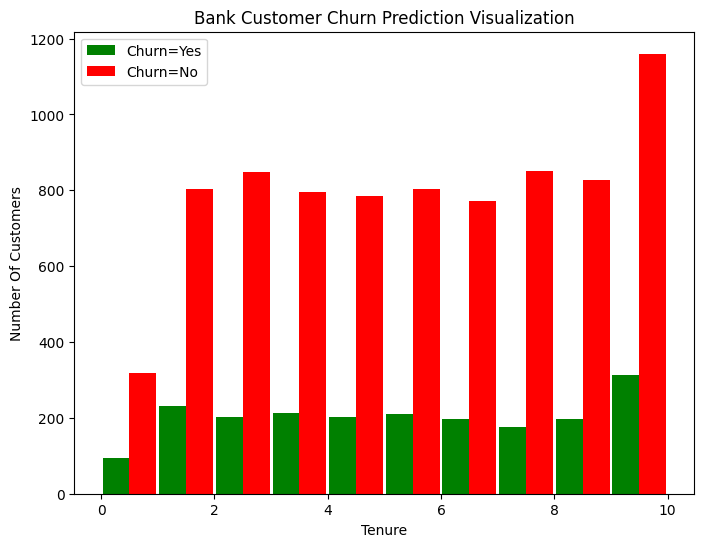

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (previous code to load and preprocess data) ...

#'Exited' is 0 for No and 1 for Yes
tenure_churn_no = df[df['Exited'] == 0]['Tenure']
tenure_churn_yes = df[df['Exited'] == 1]['Tenure']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist([tenure_churn_yes, tenure_churn_no],
         rwidth=0.95,
         color=['green', 'red'],
         label=['Churn=Yes', 'Churn=No'])

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Bank Customer Churn Prediction Visualization")
plt.legend()
plt.show()

In [37]:
exited_by_country = df.groupby('Geography')['Exited'].sum()
exited_by_country

,Exited
Geography,
France,810
Germany,814
Spain,413


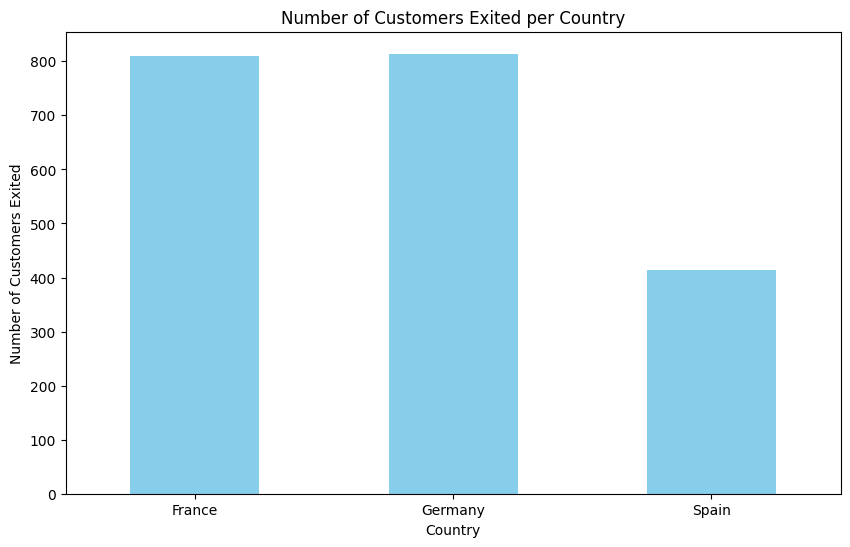

In [38]:
plt.figure(figsize=(10, 6))
exited_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Customers Exited per Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers Exited')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.show()


Label Encoding

In [40]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [41]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-41-e608bb382eef>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-41-e608bb382eef>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [43]:
df.Gender.unique()

array([1, 0])

In [56]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1[df1.select_dtypes(bool).columns] = df1.select_dtypes(bool).astype(int)
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [57]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


Scailing

In [58]:
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts',"Tenure"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [59]:
for col in df:
   print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [60]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [61]:
X_train.shape

(8000, 12)

Build a model (ANN) in tensorflow/keras

In [62]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7022 - loss: 1239.6190
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6979 - loss: 69.7761
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 46.1540
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6925 - loss: 54.7407
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6839 - loss: 43.3415
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6679 - loss: 73.5348
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 46.3100
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6765 - loss: 59.3316
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6900 - loss: 46.6591
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6955 - loss: 54.9689
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6975 - loss: 52.2518
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━

In [63]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 20.0331


[20.33608627319336, 0.7900000214576721]

In [64]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[4.170747e-33],
       [1.228230e-37],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00]], dtype=float32)

In [65]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
y_test[:10]

,Exited
7054,0
442,0
3954,0
2288,0
3196,0
6178,0
8351,0
5658,1
2065,0
413,1


In [67]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.26      0.02      0.04       405

    accuracy                           0.79      2000
   macro avg       0.53      0.50      0.46      2000
weighted avg       0.69      0.79      0.71      2000



Text(95.72222222222221, 0.5, 'Truth')

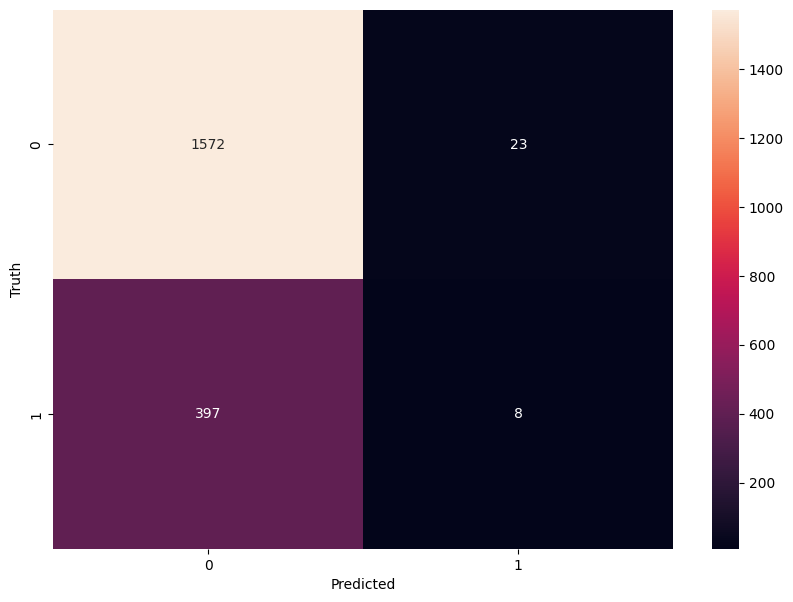

In [68]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')